In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# To test whether there is a trend in if there are some loci that tend to have more opas in frame

In [3]:
metadata = pd.read_csv('../../results/opa_metadata_locus.csv', index_col = 0)

In [4]:
# Get fraction in frame by locus

loci = []
num_in_frame = []
num_total = []

for locus, df in metadata.groupby('locus'):
    loci.append(locus)
    num_in_frame.append(np.sum(df['in_frame']))
    num_total.append(len(df))


locus_frame = pd.DataFrame({'locus':loci, 'num_in_frame':num_in_frame, 'num_total':num_total})
locus_frame['frac_in_frame'] = locus_frame['num_in_frame']/locus_frame['num_total']
locus_frame['num_in_frame_error'] = np.sqrt(locus_frame['num_in_frame'])
locus_frame['frac_in_frame_error'] = locus_frame['num_in_frame_error']/locus_frame['num_total']

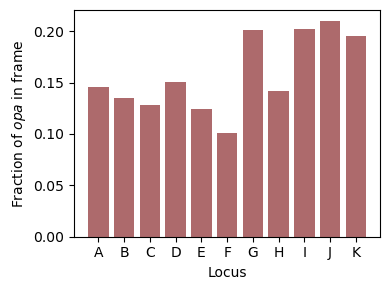

In [10]:
plt.figure(figsize = (4,3))
plt.bar(locus_frame['locus'], locus_frame['frac_in_frame'], color = '#ad6a6c')
# plt.errorbar(locus_frame['locus'], locus_frame['frac_in_frame'], yerr = locus_frame['frac_in_frame_error'], color = 'k', linestyle = '')
plt.xlabel('Locus')
plt.ylabel('Fraction of $opa$ in frame')
plt.tight_layout()
plt.savefig('../../figures/frame/frame_on_by_locus.png', dpi = 300)
plt.savefig('../../figures/frame/frame_on_by_locus.pdf')
plt.show()

In [8]:
# Testing significance by comparing to the mean fraction in frame
value = metadata['in_frame'].sum()/len(metadata)
print('mean value: ', value)

for i, row in locus_frame.iterrows():
    stat, pval = proportions_ztest(row['num_in_frame'], row['num_total'], value)
    print(row['locus'], ", p = ", pval*11)

# None are significant after correcting for multiple hypothesis testing

mean value:  0.1572700296735905
A , p =  7.04398089657327
B , p =  4.163559451184161
C , p =  2.115935645842623
D , p =  8.638417397268949
E , p =  1.476062566550717
F , p =  0.05675999753861347
G , p =  1.1768258469207913
H , p =  5.55071770128832
I , p =  1.1952900119734569
J , p =  0.6071513997948164
K , p =  1.9586768395773015


In [ ]:
# Testing significance by doing pairwise comparisons to opaK

for i, row in locus_frame.iterrows():
    locus = row['locus']
    if locus!='K':
        locus_frame_subset = locus_frame[(locus_frame['locus']==locus)|(locus_frame['locus']=='K')]
        stat, pval = proportions_ztest(locus_frame_subset['num_in_frame'].values, locus_frame_subset['num_total'].values)
        print(locus, ", p = ", pval*11)

# None are significant after correcting for multiple hypothesis testing

A , p =  2.0107570017774465
B , p =  1.2643225138761132
C , p =  0.671631243143665
D , p =  2.527009536157963
E , p =  0.509229255383289
F , p =  0.06742990525220488
G , p =  9.6737335154112
H , p =  1.5724134503720368
I , p =  9.46970997448965
J , p =  7.722699543400761


In [ ]:
# There are no significant differences between fraction in frame in each locus and opaK
# either by comparing to the mean or doing pairwise comparisons to opaK